In [7]:
import pandas as pd
from analysis.utils import plot_variable_importance

In [8]:
df = pd.read_csv('../data/df_simple_model.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15747 entries, 0 to 15746
Columns: 1447 entries, Age to PositionCategory_Sturm
dtypes: float64(5), int64(1442)
memory usage: 173.8 MB


In [10]:
# X und y festlegen
y = df["Value"]
X = df.drop("Value", axis = 1)

In [11]:
# Import Functions
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Instantiate Model
model = XGBRegressor()

# fit model
model.fit(X, y)

#make prediction
y_pred = model.predict(X)

# Evaluate Model Performance
mean_squared_error(y, y_pred, squared=False)

1482976.898052275

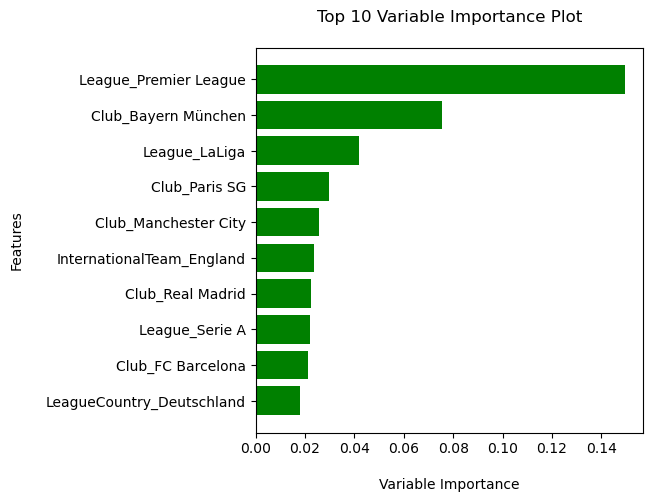

In [12]:
plot_variable_importance(model, X, 10)